## This is Project phase 2 by Group-23 
Rollnumber : 23100021, 23100268, 23100035, 23100174, 23100281, 21030026

For This phase instead of dowloding the whole dataset we get  the features and label of the data in csv. We further divide this data into train and test set and use it for training and testing our models. You can dowload the csv of traing set from [here](https://drive.google.com/file/d/1uOBmLfpUqFfOeew4oQhhHCITGOU65Jv5/view?usp=sharing) and test data csv from [here](https://drive.google.com/file/d/1uOBmLfpUqFfOeew4oQhhHCITGOU65Jv5/view?usp=sharing). We have carefully selected our training and testing splits by testing our model for 50:50, 60:40 , 70:30 , 80:20 splits of tarin and test data respectively and selected 80:20 splits for which the model were able to better learn form the data.

Besides the blow model given we tried diffrent cominations of model for diffrent parameters like DecssionTrees with AdaBooster, svm with polynominal Kernal but found the selected models to perform well. We have performed 5-fold cross validations and plot the scores and loss plots for hyper parameter tuning and selected the parameters on which our model performed best.

In [ ]:
#test data
!gdown https://drive.google.com/uc?id=1Dfud716I5zO_k-Lspd5HBjx4yt4vxMYN



Downloading...
From: https://drive.google.com/uc?id=1Dfud716I5zO_k-Lspd5HBjx4yt4vxMYN
To: /content/test.csv
100% 952k/952k [00:00<00:00, 15.0MB/s]


In [ ]:
#train data
!gdown https://drive.google.com/uc?id=1uOBmLfpUqFfOeew4oQhhHCITGOU65Jv5


Downloading...
From: https://drive.google.com/uc?id=1uOBmLfpUqFfOeew4oQhhHCITGOU65Jv5
To: /content/train.csv
100% 3.91M/3.91M [00:00<00:00, 34.2MB/s]


#Import Liberaries

In [ ]:
%pip install python_speech_features

  Created wheel for python-speech-features: filename=python_speech_features-0.6-py3-none-any.whl size=5888 sha256=361e141bfc4e314c9774433002c9534bb1eaa486fe1b51c7b834d625af4cdbf7
  Stored in directory: /root/.cache/pip/wheels/b0/0e/94/28cd6afa3cd5998a63eef99fe31777acd7d758f59cf24839eb
Successfully built python-speech-features


In [ ]:
import python_speech_features as mfcc
from scipy.io.wavfile import read
import numpy as np
import os
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn import svm

In [ ]:
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier

# Read and process the data 

In [ ]:
# convert Audio to features

def getMFCC(audio, sr):
    features = mfcc.mfcc(audio, sr, 0.025, 0.01, 13, appendEnergy = True)
    return np.mean(features, axis=0)

In [ ]:
def read_csv_to_data_frame(path):
    df = pd.read_csv(path)
    return df

In [ ]:


def pandas_frame_to_nump(df):
    lst = ["0", "1", "2", "3", "4", "5", "6", "7", "8","9","10","11","12"]
    features = df[lst].to_numpy()
    labels = df["labels"]
    file_names = df["file_name"]
    classes = df["label_dis"].unique()
    return features, labels, classes, file_names

In [ ]:
#get mean and stander deviation for each feature for training data #
def getMeanAndStd(X):
    """
    get the stander deviation and mean for a feature for all values of training data.
    each row contains value of single feature for all training instances

    Arguments
    ---------
    X : array
        The input data-set of shape (n, m), where m is the number of training examples and n is the number of labels.

    Returns
    -------
    stats : array
        The array of stats containing stander deviation and mean for a feature for all values of training data.
    each row contains value of single feature for all training instances
    """
    stats = [(round(np.mean(x), 2), round(np.std(x), 2)) for x in X]
    return stats

In [ ]:
# get mean and stander deviation for each feature for training data #
def normalizeTheFeatures(X, stats, start = 0):
    """
    get the stander deviation and mean for a feature for all values of training data.
    each row contains value of single feature for all training instances

    Arguments
    ---------
    X : array
        The input data-set of shape (n, m), where m is the number of training examples and n is the number of labels.
    stats: array
        The array shape (n,), where n is the number of features for defining an instance. here each element is a tuple
        where first element of tuple is the mean of the feature for all training example and the second element of tuple
        is the stander deviation of the feature for all training example.

    Returns
    -------
    normalizedX : array
        The normalized 2D array of input features on provided mean and std . The array is of shape(n, m)

    """
    n = X.shape[0]
    np.finfo('float64')
    np.set_printoptions(precision=20)
    normalizedX = np.ones((n, X.shape[1]))
    for i in range(start, n):
        normalizedX[i] = (X[i] - stats[i][0])/(stats[i][1] if stats[i][1] !=0 else 1)

    return normalizedX

In [ ]:
def getDataIntoFeatureVactor(path):
    features_mat = []
    label = []
    dir = os.listdir(path)
    dir_dic = {}
    for count, x in enumerate(dir):
        path2 = path+"/"+x
        for sp in os.listdir(path2):
            path3 = path2 + "/" + sp
            for file in os.listdir(path3):
                sr, audio = read(path3 + "/" + file)
                features = getMFCC(audio, sr)
                features_mat.append(features)
                label.append(count)
        dir_dic[x] = count

    features_np_mat = np.array(features_mat)
    return features_np_mat, label, dir_dic

In [ ]:
print("Loading the train and test data as Features...")
train_df = read_csv_to_data_frame("train.csv")
test_df = read_csv_to_data_frame("test.csv")
train_data, train_label, total_class, file_name1 = pandas_frame_to_nump(train_df)
test_data,test_label, total_class2, file_name2iiii = pandas_frame_to_nump(test_df)

print("Loading completed")
print("Preprocesing the train and test data...")
train_data = np.transpose(train_data)
test_data = np.transpose(test_data)
stats = getMeanAndStd(train_data)
normalized_train_data = normalizeTheFeatures(train_data, stats, 0)
normalized_test_data = normalizeTheFeatures(test_data,stats, 0)
normalized_train_data = np.transpose(normalized_train_data) 
normalized_test_data = np.transpose(normalized_test_data)
print("Preprocesing Completed")

number_of_classes = len(total_class)

Loading the train and test data as Features...
Loading completed
Preprocesing the train and test data...
Preprocesing Completed


In [ ]:
def getConfusionMatrixAsPandasDataFrame(matrix, classes):
    '''
      Form the given 2 d numpy confusion matrix, return a data frame of counfusion matrix with headers for easy dispaly of confusion matrix

      Arguments
      ---------
       matrix: 2D numpy arry
        A 2D array containg confusion matrix

      axis: int
       A axis column to get the confuion matrix form given matrix either row or column wise. if axis=0 the the given
       confusion matrix is stores precdiction of a perticular class row vise and vise versa for column.

      Returns
      -------

      count_matrix :pandas dataframe
        a data frame of easy visulatization of

      '''
    matrix = matrix.astype(int)
    gold_labels = {}
    predicted_labels = []
    for x in classes:
        gold_label = 'Gold ' + x.upper()
        gold_labels[gold_label]=''
        predicted_label = 'Predicted ' + x.upper()
        predicted_labels.append(predicted_label)

    con_mats = pd.DataFrame(gold_labels,
                           index=predicted_labels)
    for count, x in enumerate(con_mats):
        con_mats[x] = matrix[count]

    return con_mats

In [ ]:
def printReport( confusion_matrics, accuracy, f1, precsion, recall, class_report, classes):
    '''
    Print confusion matrix and report
    Arguments
    ---------
    accuracy: int
    contains accuracy of our prediction

    confusion_matrix:
    confusion matrix for our prediction

    axis: int
    A axis column to get the confuion matrix form given matrix either row or column wise. if axis=0 the the given
    confusion matrix is stores precdiction of a perticular class row vise and vise versa for column.

    Returns
    -------
    none


    '''
    print("---------------------------------------------------------------------------------------")
    print("\n\t\t\t\tConfusion Matrix\n")
    print(getConfusionMatrixAsPandasDataFrame(confusion_matrics, classes))
    print("\nAccuracy Score: {}%".format(round(accuracy,2)))
    print("\nF1 Score: {}".format(round(f1, 2)))
    print("\nRecall Score: {}%".format(round(recall, 2)))
    print("\nPrecision Score: {}%".format(round(precsion, 2)))
    print("\n\t\t\t\t\tClass Report")
    print(class_report)
    print("---------------------------------------------------------------------------------------")

In [ ]:

def evelaution_matric(test_label, predicted_label):
    accuracy_score = (metrics.accuracy_score(test_label, predicted_label))
    accuracy_score = round(accuracy_score * 100, 2)
    confusion_mat = confusion_matrix(test_label, predicted_label)
    macro_f1 = (metrics.f1_score(test_label, predicted_label, average='macro', zero_division=0))
    macro_f1 = (round(macro_f1, 2)) * 100
    macro_precision = (metrics.precision_score(test_label, predicted_label, average='macro', zero_division=0))
    macro_precision = (round(macro_precision, 2)) * 100
    macro_recall = (metrics.recall_score(test_label, predicted_label, average='macro', zero_division=0))
    macro_recall = round(macro_recall * 100, 2)
    class_report = classification_report(test_label, predicted_label, zero_division=1)


    return confusion_mat, accuracy_score, macro_f1, macro_precision, macro_recall, class_report

In [ ]:
# for given values of x and y axes plot the graph
def plot_graph(x, y1, y2, x_axis_label, y_axis_label, y1_legend, y2_legend, title):
    plt.plot(x, y1)
    plt.plot(x, y2)
    plt.title(title)
    plt.xlabel(x_axis_label)
    plt.ylabel(y_axis_label)
    plt.legend([y1_legend, y2_legend], loc="upper right")
    plt.show()


#Part 1 

## Random forset with and without bagging 

Note: Here for hyper paratmere tuning we are using tree depth and number of estimators. We run our model for both entropy and gini loss and it performed the same so that is not being use to train hyper parameter

loss function does not make the diffrence but the max depth, esimater and  max_sample size are one that nedd tunin g

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
def model_error_randomforest( n_estimator, max_depth, train_data, train_label, test_data, test_label):
    bg = RandomForestClassifier(max_depth=max_depth, random_state = 3 , n_estimators=n_estimator)
    bg.fit(train_data, train_label)
    predicted_label1 = bg.predict(train_data)
    predicted_label2 = bg.predict(test_data)
    train_er = bg.score(train_data, train_label)
    test_er = bg.score(test_data, test_label)
    tr_loss = cross_entropy(predicted_label1, train_label)
    ts_loss = cross_entropy( predicted_label2, test_label)
    return train_er, test_er, tr_loss, ts_loss

In [ ]:
def cross_entropy(predictions, targets, epsilon=1e-12):
    """
    Computes cross entropy between targets (encoded as one-hot vectors)
    and predictions.
    Input: predictions (N, k) ndarray
           targets (N, k) ndarray
    Returns: scalar
    """
    predictions = np.clip(predictions, epsilon, 1. - epsilon)
    ce = - np.mean(np.log(predictions) * targets)
    return ce

In [36]:
def cross_val_RandomForest(train_feature_matrix, y_train, cv=5):
    n_estimators = np.arange(100, 800, 100)
    max_depth = np.arange(10, 70, 10)
    comb_array = np.array(np.meshgrid(n_estimators, max_depth)).T.reshape(-1, 2)
    max_d = np.max(max_depth)
    train_data_split = np.array_split(train_feature_matrix, cv)
    y_train_data_split = np.array_split(y_train, cv)

    mean_error_test = np.zeros(len(comb_array))
    mean_error_train = np.zeros(len(comb_array))
    mean_error_test1 = np.zeros(len(max_depth))
    mean_error_train1 = np.zeros(len(max_depth))
    
    mean_loss_test1 = np.zeros(len(max_depth))
    mean_loss_train1 = np.zeros(len(max_depth))
    k = 0
    for i in range(len(comb_array)):
        es = comb_array[i][0]
        dep = comb_array[i][1]
        error_test = []
        error_train = []
        loss_test =[]
        loss_train = []
        for f in range(cv):
            x_train_data = np.concatenate(([train_data_split[x] for x in range(cv) if x != f]), axis=0)
            y_train_data = np.concatenate(([y_train_data_split[x] for x in range(cv) if x != f]), axis=0)
            x_cv = train_data_split[f]
            y_cv = y_train_data_split[f]
            train_er, test_er, tr_loss, ts_loss= model_error_randomforest( es, dep,  x_train_data, y_train_data, x_cv, y_cv)
            error_test.append(test_er)
            error_train.append(train_er)
            loss_test.append(ts_loss)
            loss_train.append(tr_loss)

        mean_test = np.mean(error_test)
        mean_train = np.mean(error_train)
        mean_error_test[i] = np.round(mean_test, 4)
        mean_error_train[i] = np.round(mean_train, 4)
        mean_error_test1[k] = np.round(mean_test, 4)
        mean_error_train1[k] = np.round(mean_train, 4)
        mean_loss_test1[k] = np.round( np.mean(loss_test), 4)
        mean_loss_train1[k] = np.round( np.mean(loss_train), 4)
        k+=1

        if max_d == dep:
            plot_graph(max_depth,  mean_loss_test1, mean_loss_train1, "depth", "train and validation loss",
                       "validation loss",
                       "train loss", "graph between train and validation loss for esitmators =" + str(es))
            mean_error_test1 = np.zeros(len(max_depth))
            mean_error_train1 = np.zeros(len(max_depth))
            mean_loss_test1 = np.zeros(len(max_depth))
            mean_loss_train1 = np.zeros(len(max_depth))
            k = 0


    # find the combo which gives minmum errror on both train and val data  early
    max_val_cost_arg = np.argwhere(mean_error_test == np.max(mean_error_test))
    arr = mean_error_train[max_val_cost_arg]
    max_val_train_arg = np.argmax(arr)
    n = max_val_cost_arg[max_val_train_arg][0]
    best_dep = comb_array[n][1]
    best_es =comb_array[n][0]
    return best_dep, best_es


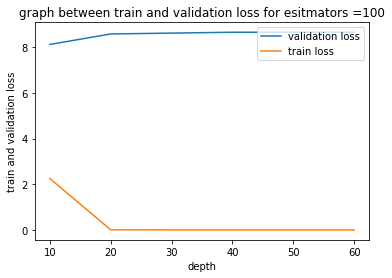

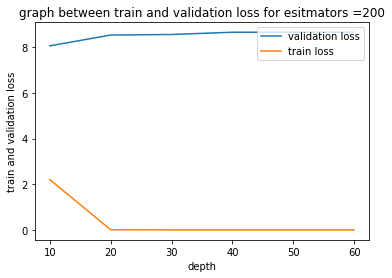

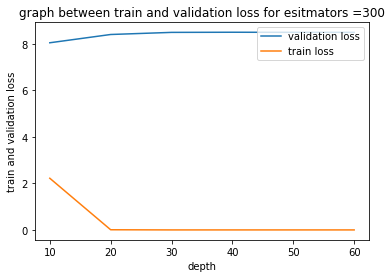

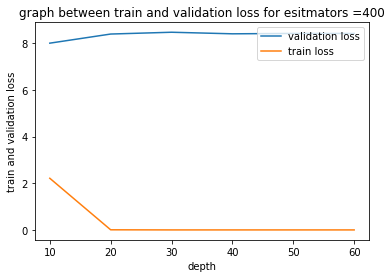

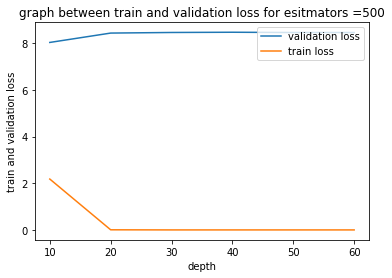

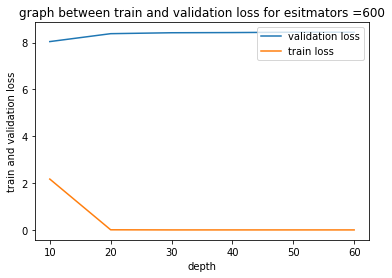

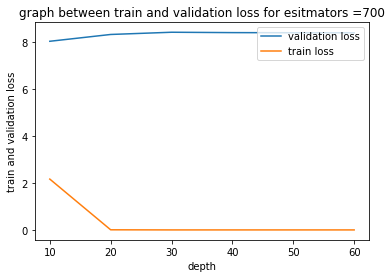

depth = 50
esitamor = 700
---------------------------------------------------------------------------------------

				Confusion Matrix

              Gold EN  Gold UE  Gold UR
Predicted EN      764      100      106
Predicted UE      189     1119      183
Predicted UR      117       80      754

Accuracy Score: 77.29%

F1 Score: 77.0

Recall Score: 76.61%

Precision Score: 78.0%

					Class Report
              precision    recall  f1-score   support

           0       0.79      0.71      0.75      1070
           1       0.75      0.86      0.80      1299
           2       0.79      0.72      0.76      1043

    accuracy                           0.77      3412
   macro avg       0.78      0.77      0.77      3412
weighted avg       0.78      0.77      0.77      3412

---------------------------------------------------------------------------------------


In [ ]:
dep , es = cross_val_RandomForest(normalized_train_data, train_label, cv=5)
print("depth =", dep)
print("esitamor =", es)

rd  = RandomForestClassifier( max_depth= dep, random_state = 3, n_estimators=es)
rd.fit(normalized_train_data, train_label)
predicted_label = rd.predict(normalized_test_data)

cm, ac, macro_f1, macro_precision, macro_recall, class_report =evelaution_matric(test_label, predicted_label)
printReport( cm, ac, macro_f1, macro_precision, macro_recall, class_report, total_class)

In this part, although KNN gives the higest accuracy but it might be due to getting taring and testing data from the same user. We also tested it from some outside data where Random forest perform well. Moving Forward, alnog with Random forst we tried bagging and boosting esimators. The bagging estimater does not perform well but boosting gives a good accuray with less number of estimtors in Random forest. But with large number of esitmators, random forset out performed bagging where accuray of bagging reamain arround 75% and random forest increase to 77%. 

In [ ]:
dep = 50
es =700

In [ ]:
## running of random forset using the same setting with boosters

bg = BaggingClassifier( RandomForestClassifier( max_depth= dep, random_state = 3, n_estimators=es), max_samples = 0.8, random_state=3, n_estimators=20)
bg.fit(normalized_train_data, train_label)
predicted_label = bg.predict(normalized_test_data)

cm, ac, macro_f1, macro_precision, macro_recall, class_report =evelaution_matric(test_label, predicted_label)
printReport( cm, ac, macro_f1, macro_precision, macro_recall, class_report, total_class)

---------------------------------------------------------------------------------------

				Confusion Matrix

              Gold EN  Gold UE  Gold UR
Predicted EN      735      100      116
Predicted UE      222     1129      224
Predicted UR      113       70      703

Accuracy Score: 75.23%

F1 Score: 75.0

Recall Score: 74.34%

Precision Score: 76.0%

					Class Report
              precision    recall  f1-score   support

           0       0.77      0.69      0.73      1070
           1       0.72      0.87      0.79      1299
           2       0.79      0.67      0.73      1043

    accuracy                           0.75      3412
   macro avg       0.76      0.74      0.75      3412
weighted avg       0.76      0.75      0.75      3412

---------------------------------------------------------------------------------------


#Part 2


In [ ]:
def model_error( gemma, train_data, train_label, test_data, test_label):
    rbf_svc = svm.SVC(kernel='rbf', gamma= gemma)
    rbf_svc.fit(train_data, train_label)
    train_er = rbf_svc.score(train_data, train_label)
    test_er = rbf_svc.score(test_data, test_label)
    predicted_label1 = bg.predict(train_data)
    predicted_label2 = bg.predict(test_data)
    train_er = rbf_svc.score(train_data, train_label)
    test_er = rbf_svc.score(test_data, test_label)
    tr_loss = cross_entropy(predicted_label1, train_label)
    ts_loss = cross_entropy( predicted_label2, test_label)
    return train_er, test_er, tr_loss, ts_loss


In [ ]:
def cross_val_svm(train_feature_matrix, y_train, cv=5):
    # split the data into numver of parts for which we have to run cross validation
    gamma_range = np.logspace(-2, 2, 13)

    train_data_split = np.array_split(train_feature_matrix, cv)
    y_train_data_split = np.array_split(y_train, cv)

    mean_error_test = np.zeros(len(gamma_range))
    mean_error_train = np.zeros(len(gamma_range))
    for count, i in enumerate(gamma_range):
        error_test = []
        error_train = []
        for f in range(cv):
            x_train_data = np.concatenate(([train_data_split[x] for x in range(cv) if x != f]), axis=0)
            y_train_data = np.concatenate(([y_train_data_split[x] for x in range(cv) if x != f]), axis=0)
            x_cv = train_data_split[f]
            y_cv = y_train_data_split[f]
            train_er, test_er,  tr_loss, ts_loss = model_error(i, x_train_data, y_train_data, x_cv, y_cv)
            error_test.append(test_er)
            error_train.append(train_er)
        mean_test = np.mean(error_test)
        mean_train = np.mean(error_train)
        mean_error_test[count] = np.round(mean_test, 2)
        mean_error_train[count] = np.round(mean_train, 2)

    plot_graph(gamma_range.tolist() ,mean_error_train , mean_error_test, "Gemma", "train and validation score", "training score", "valiadtion score", "test and validtion score for svm" )
    min_val_cost_arg = np.argwhere(mean_error_test == np.max(mean_error_test))
    arr = mean_error_train[min_val_cost_arg]
    min_val_train_arg = np.argmax(arr)

    n = min_val_cost_arg[min_val_train_arg][0]
    return gamma_range[n]

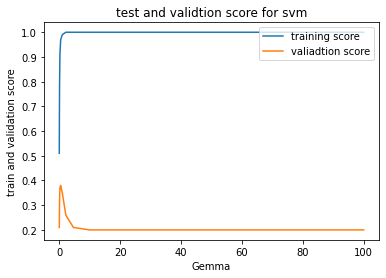

---------------------------------------------------------------------------------------

				Confusion Matrix

              Gold EN  Gold UE  Gold UR
Predicted EN      862       96       75
Predicted UE      118     1137       97
Predicted UR       90       66      871

Accuracy Score: 84.11%

F1 Score: 84.0

Recall Score: 83.87%

Precision Score: 84.0%

					Class Report
              precision    recall  f1-score   support

           0       0.83      0.81      0.82      1070
           1       0.84      0.88      0.86      1299
           2       0.85      0.84      0.84      1043

    accuracy                           0.84      3412
   macro avg       0.84      0.84      0.84      3412
weighted avg       0.84      0.84      0.84      3412

---------------------------------------------------------------------------------------


In [26]:

gemma = cross_val_svm(normalized_train_data, train_label, cv=5)
rbf_svc = svm.SVC(kernel='rbf', gamma=gemma)
rbf_svc.fit(normalized_train_data, train_label)
predicted_label = rbf_svc.predict(normalized_test_data)

#print report
cm, ac, macro_f1, macro_precision, macro_recall,class_report =evelaution_matric(test_label, predicted_label)
printReport( cm, ac, macro_f1, macro_precision, macro_recall, class_report, total_class)

#Part 3

In [27]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler  
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [29]:
model = MLPClassifier(max_iter=1000, random_state=1).fit(normalized_train_data, train_label)

alpha = [0.01, 0.05, 0.001, 0.005, 0.0001]
param_grid = dict(alpha=alpha)
grid_alpha = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=5, scoring='neg_log_loss', return_train_score=True)
grid_alpha_result = grid_alpha.fit(normalized_train_data, train_label)
print("Best: %f using %s" % (grid_alpha_result.best_score_, grid_alpha_result.best_params_))

Best: -1.289775 using {'alpha': 0.05}


Cross Validation

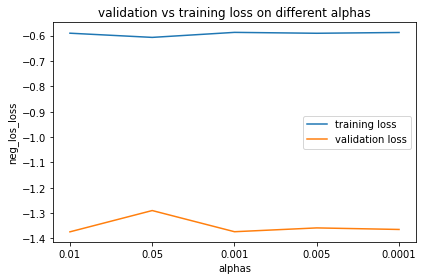

In [30]:
alpha_tune = ['0.01', '0.05' ,'0.001', '0.005','0.0001']
training_loss_tune = [grid_alpha.cv_results_['mean_train_score'][0],
                 grid_alpha.cv_results_['mean_train_score'][1], 
                 grid_alpha.cv_results_['mean_train_score'][2], 
                 grid_alpha.cv_results_['mean_train_score'][3],
                grid_alpha.cv_results_['mean_train_score'][4]]

validation_loss_tune = [grid_alpha.cv_results_['mean_test_score'][0],
                  grid_alpha.cv_results_['mean_test_score'][1], 
                  grid_alpha.cv_results_['mean_test_score'][2], 
                  grid_alpha.cv_results_['mean_test_score'][3],
                  grid_alpha.cv_results_['mean_test_score'][4]]

plt.plot(alpha_tune, training_loss_tune, label='training loss')
plt.plot(alpha_tune, validation_loss_tune, label='validation loss')
plt.title('validation vs training loss on different alphas')
plt.xlabel('alphas')
plt.ylabel('neg_los_loss')
plt.legend()
plt.tight_layout()
plt.show()

In [31]:
model = MLPClassifier(random_state=1, hidden_layer_sizes=(100,200,200), learning_rate = 'adaptive').fit(normalized_train_data, train_label)
alpha = [0.01]
param_grid = dict(alpha=alpha)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=5, scoring='neg_log_loss', return_train_score=True)
grid_result = grid.fit(normalized_train_data, train_label)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: -3.459484 using {'alpha': 0.01}


In [ ]:
Plotting the Results of Cross Validation

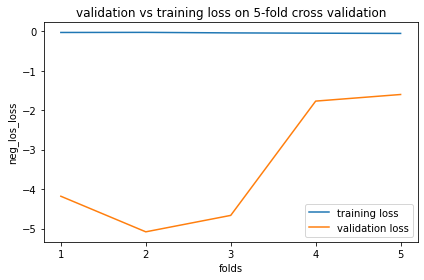

In [32]:
folds = np.array([1, 2, 3, 4, 5])
training_loss = [grid.cv_results_['split0_train_score'][0],
                 grid.cv_results_['split1_train_score'][0], 
                 grid.cv_results_['split2_train_score'][0], 
                 grid.cv_results_['split3_train_score'][0],
                 grid.cv_results_['split4_train_score'][0]]

validation_loss = [grid.cv_results_['split0_test_score'][0],
                 grid.cv_results_['split1_test_score'][0], 
                 grid.cv_results_['split2_test_score'][0], 
                 grid.cv_results_['split3_test_score'][0],
                 grid.cv_results_['split4_test_score'][0]]

plt.plot(folds,training_loss, label='training loss')
plt.plot(folds, validation_loss, label='validation loss')
plt.title('validation vs training loss on 5-fold cross validation')
plt.xlabel('folds')
plt.ylabel('neg_los_loss')
plt.xticks([1,2,3,4,5])
plt.legend()
plt.tight_layout()
plt.show()

In [33]:
predicted_labels = grid.predict(normalized_test_data)

Evaluation

In [35]:
total_class =['en', 'ue', 'ur']
cm, ac, macro_f1, macro_precision, macro_recall,class_report =evelaution_matric(test_label, predicted_labels)
printReport( cm, ac, macro_f1, macro_precision, macro_recall, class_report, total_class)

---------------------------------------------------------------------------------------

				Confusion Matrix

              Gold EN  Gold UE  Gold UR
Predicted EN      771      124       94
Predicted UE      133     1033       95
Predicted UR      166      142      854

Accuracy Score: 77.9%

F1 Score: 78.0

Recall Score: 77.82%

Precision Score: 78.0%

					Class Report
              precision    recall  f1-score   support

           0       0.78      0.72      0.75      1070
           1       0.82      0.80      0.81      1299
           2       0.73      0.82      0.77      1043

    accuracy                           0.78      3412
   macro avg       0.78      0.78      0.78      3412
weighted avg       0.78      0.78      0.78      3412

---------------------------------------------------------------------------------------
